# **Predict Breast Cancer with random forest, PCA and SVM**

In [2]:
__author__ = "Minh Nguyen"
__email__ = "minhnn170903@gmail.com"
__website__ = "https://github.com/Minh170903"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## **Introduction**

This project utilize Principal Components Analysis (PCA) to transform the breast cancer dataset and then use the Support Vector Machine model to predict whether a patient has breast cancer.

I have taken multiple Machine Learning course in the University of Sydney and now I want to apply what I have learnt so far to become a competent data analyst .Below are the Exploraory Data Analysis and model building to predict breast cancer based on feature variables.

### Data info

The [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) Data Set is obtained from UCI Machine Learning Repository. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The dataset is also available in the Scikit Learn library. I will use Scikit Learn to import the dataset and explore its attributes.
The dataset is also available in the Scikit Learn library. I will use Scikit Learn to import the dataset and explore its attributes.

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer.DESCR[27:3130])


Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-M

The dataset has 569 instances and 30 numeric variables:

## **Discover**

In [7]:
# As the data is clean and has no missing value, so we will skip the cleaning step

In [8]:
df_features = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### **Target Variable**

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
df_target = pd.DataFrame(cancer.target, columns=['target'])
df_target['target'].value_counts()

,count
target,
1,357
0,212


According to the description, the distribution of the target variable is: 212 - Malignant, 357 - Benign, as represented by 0 and 1

Let's merge the features and the target variable together:

In [11]:
df = pd.concat([df_features, df_target], axis=1)

In [12]:
# For better interpretation of the classification problem
# I will transform the target variable to string
df['target'] = df['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [13]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## **Explorartory Data Analysis**

In [14]:
# Set style
sns.set_style('darkgrid')

**count plot**

Text(0.5, 1.0, 'Count Plot of Diagnosis')

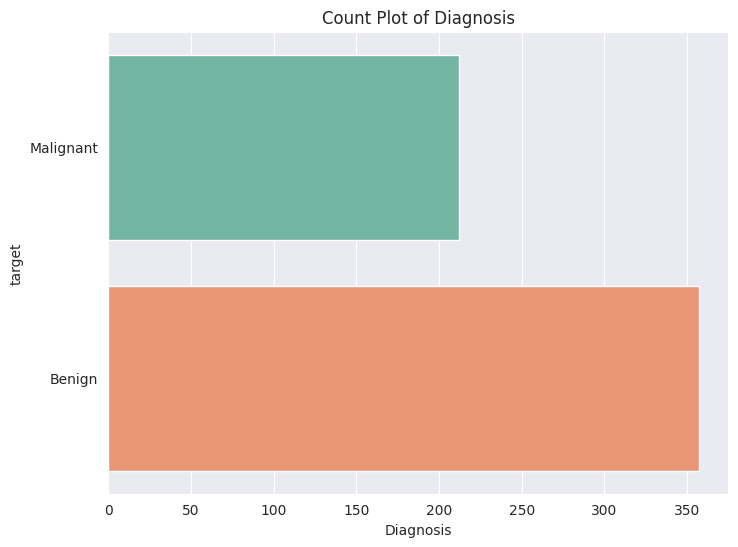

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(df['target'],palette="Set2")
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")

**Distribution**


To visualize distributions of multiple features in one figure, first I need to standardize the data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_features)

features_scaled = scaler.transform(df_features)
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=df_features.columns)

df_scaled = pd.concat([features_scaled, df['target']], axis=1)
df_scaled.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,Malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,Malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,Malignant


Now I will take a look at the distribution of each feature and see how they are different between 'benign' and 'malignant'. To see the distribution of multiple variables, we can use violin plot, swarm plot or box plot. Let's try each of these plots.

First, I "unpivot" the dataframe from wide format to long format using pd.melt function:

In [17]:
df_scaled_melt = pd.melt(df_scaled, id_vars='target',
                         var_name='features', value_name='value')
df_scaled_melt.head(3)

,target,features,value
0,Malignant,mean radius,1.097064
1,Malignant,mean radius,1.829821
2,Malignant,mean radius,1.579888


Below are the code I wrote to produce the box plots, swarm plots and violin plots

In [18]:
# violin plot
def violin_plot(features, name):
    """
    This function creates violin plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='features',
                   y='value',
                   hue='target',
                   data=data,
                   split=True,
                   inner="quart")
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


In [19]:
def strip_plot(features, name):
    """
    This function creates strip plots with jitter for features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))

    # Using stripplot with jitter to handle overplotting
    sns.stripplot(x='features', y='value', hue='target', data=data, jitter=True, dodge=True)

    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardized Value")
    plt.tight_layout()
    plt.show()


In [20]:
def box_plot(features, name):
    """
    This function creates box plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")

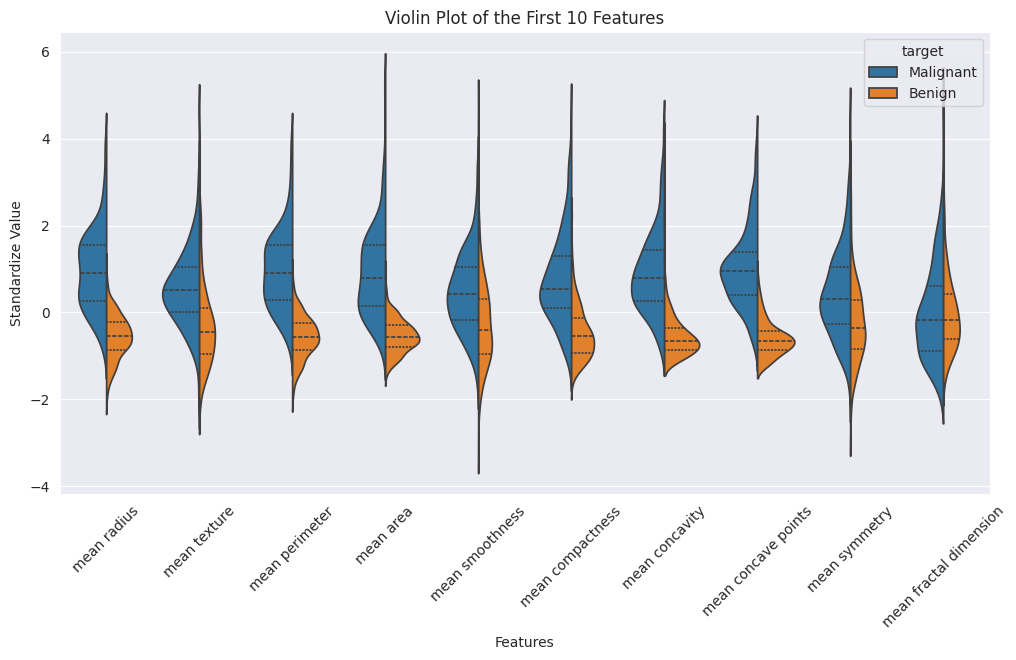

In [21]:
violin_plot(df.columns[0:10], "Violin Plot of the First 10 Features")


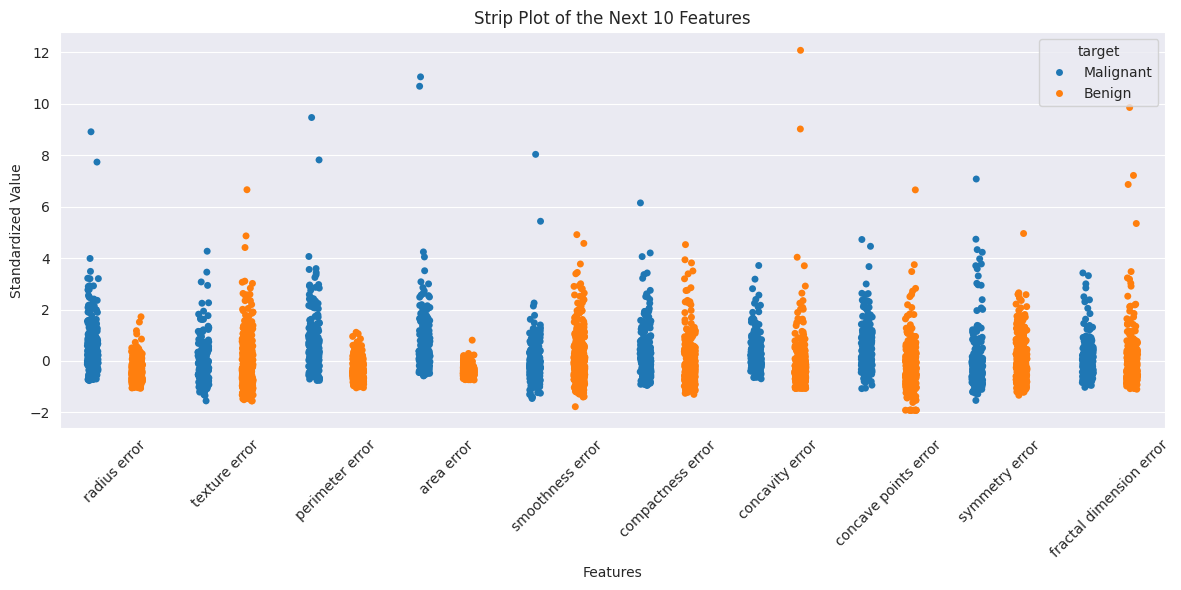

In [22]:
strip_plot(df.columns[10:20], "Strip Plot of the Next 10 Features")

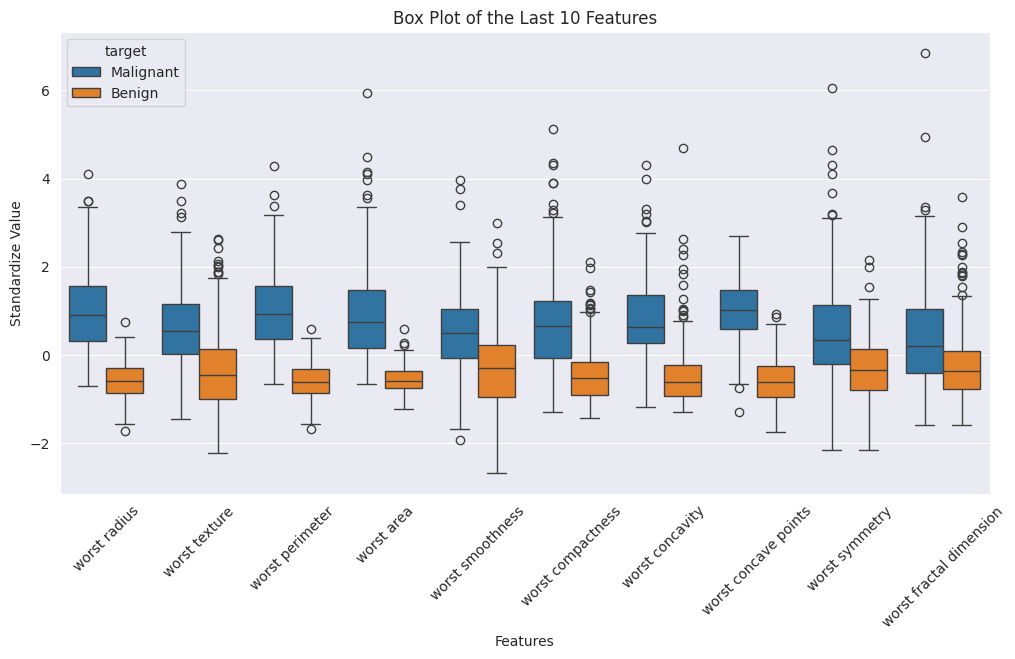

In [23]:
box_plot(df.columns[20:30], "Box Plot of the Last 10 Features")

The violin plot is particularly useful for comparing the distributions of different variables, while the swarm plot makes classification distinctions clearer. Box plots, on the other hand, are effective for comparing medians and identifying outliers.

Based on the plots, we can gather the following insights from the data:

- The median values of certain features differ significantly between 'malignant' and 'benign' cases. These differences are especially noticeable in the box plots, making them strong candidates for classification. Examples include: `mean radius`, `mean area`, `mean concave points`, `worst radius`, `worst perimeter`, `worst area`, and `worst concave points`.

- On the other hand, some features show similar distributions between 'malignant' and 'benign'. For instance, `mean smoothness`, `mean symmetry`, `mean fractal dimension`, and `smoothness error`. These features are less useful for classification.

- Certain features appear to have similar distributions and may be highly correlated with each other. For example, `mean perimeter` versus `mean area`, `mean concavity` versus `mean concave points`, and `worst symmetry` versus `worst fractal dimension`. Including all of these correlated variables in the model could lead to redundancy and should be avoided.


**Correlation**

As some dependent variables in the dataset might be highly correlated with each other. We will continue to explore the correlation of three examples above.

In [24]:
def correlation(var):
    """
    1. Print correlation
    2. Create jointplot
    """
    # Print correlation
    print("Correlation: ", df[[var[0], var[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(data=df, x=var[0], y=var[1], kind='reg')

Correlation:  0.9865068039913907


<Figure size 600x600 with 0 Axes>

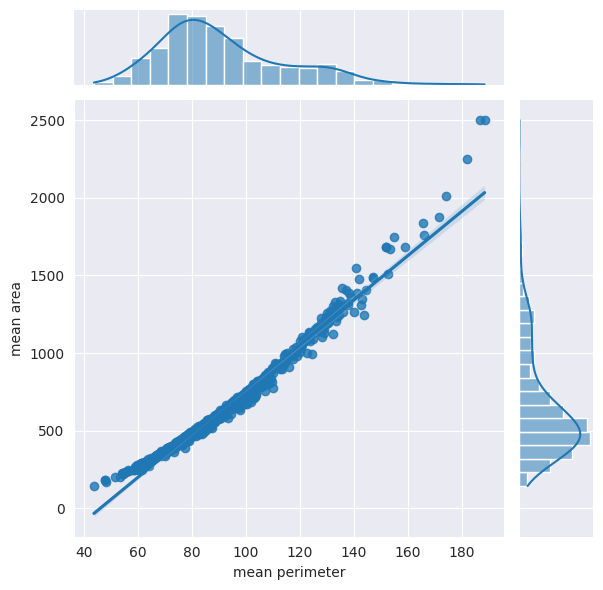

In [25]:
correlation(['mean perimeter', 'mean area'])

Correlation:  0.9213910263788588


<Figure size 600x600 with 0 Axes>

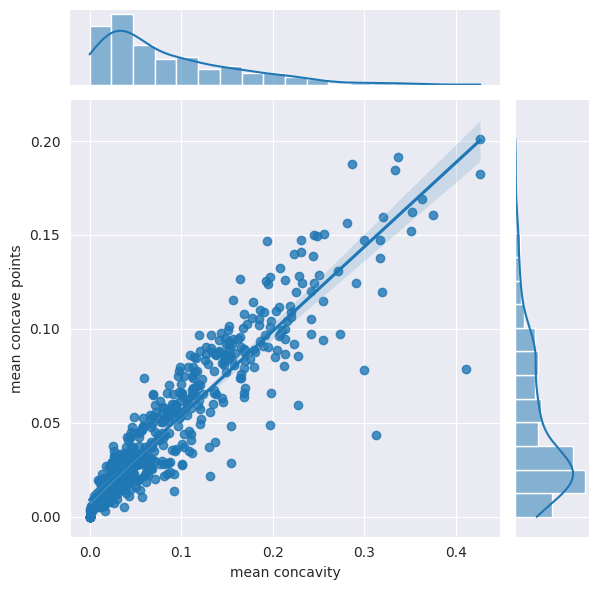

In [26]:
correlation(['mean concavity', 'mean concave points'])

Correlation:  0.537848206253609


<Figure size 600x600 with 0 Axes>

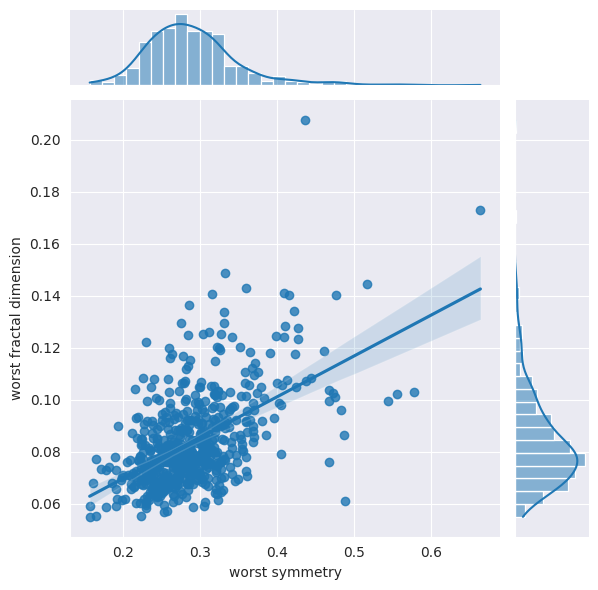

In [27]:
correlation(['worst symmetry', 'worst fractal dimension'])

 Let's create a heat map to see the overall picture on correlation.

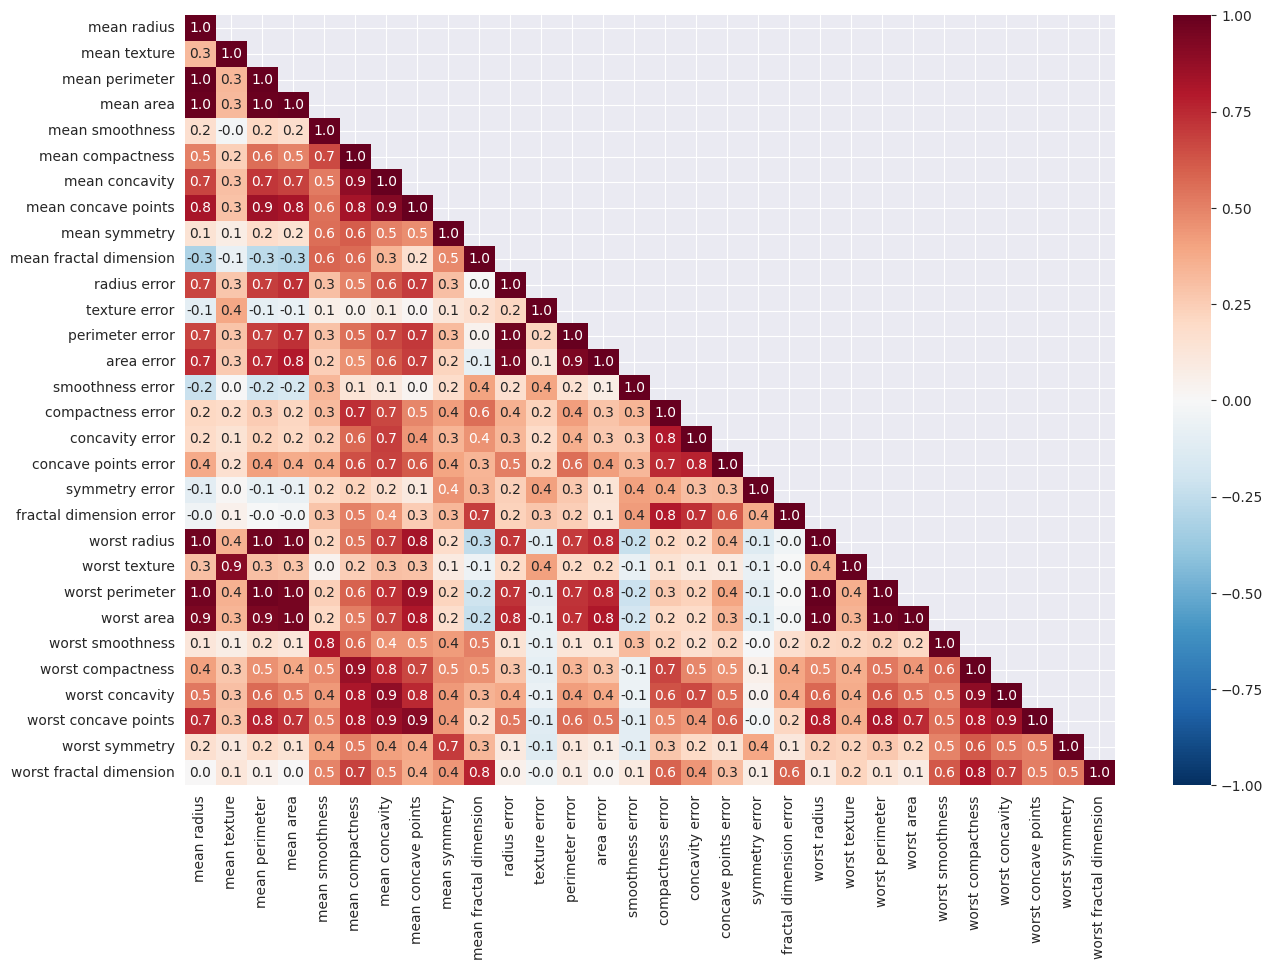

In [28]:
# Create correlation matrix
corr_mat = df_features.corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=bool)  # Use 'bool' instead of 'np.bool'
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)

plt.show()


From the heat map, we can see that many variables in the dataset are highly correlated. What are variables having correlation greater than 0.8?

<Axes: >

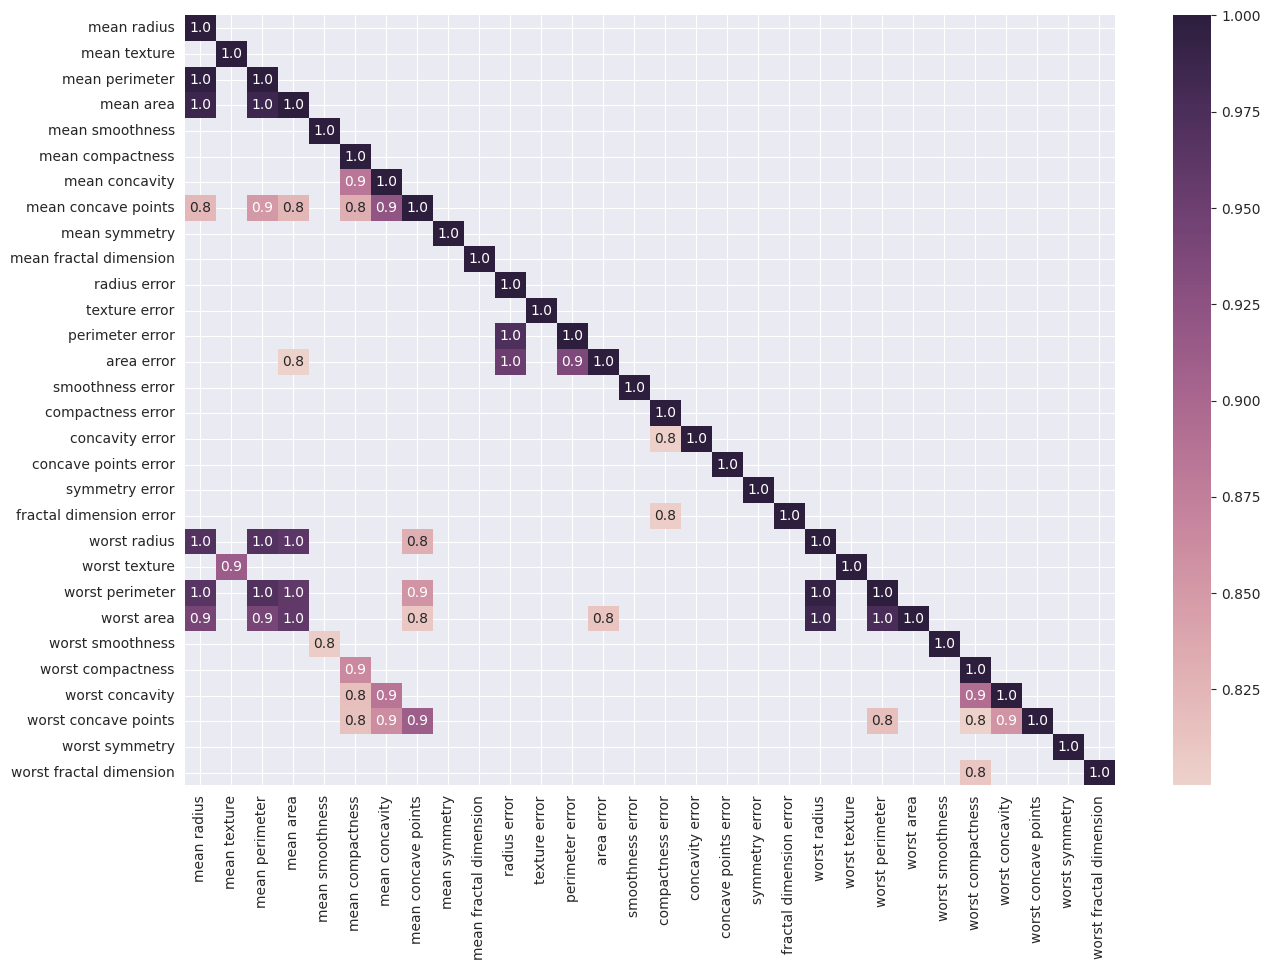

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.8], annot=True,
            fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)

## **Model Building**

### **Variable selection and Random Forest Classifier**

**Feature Selection**

I will use Univariate Feature Selection [sklearn.feature_selection.SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) to choose 5 features with the k highest scores. I choose 5 because from the heatmap I could see about 5 groups of features that are highly correlated.

In [30]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=5)
feature_selection.fit(df_features, df_target)
selected_features = df_features.columns[feature_selection.get_support()]
print("The top 5 selected features are: ", list(selected_features))

The top 5 selected features are:  ['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']


In [31]:
# Create new dataframe for selected features
X = pd.DataFrame(feature_selection.transform(df_features),
                 columns=selected_features)
X.head()

,mean perimeter,mean area,area error,worst perimeter,worst area
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0


Let's create a pairplot to see how different these features are in `malignant` and in `benign`.

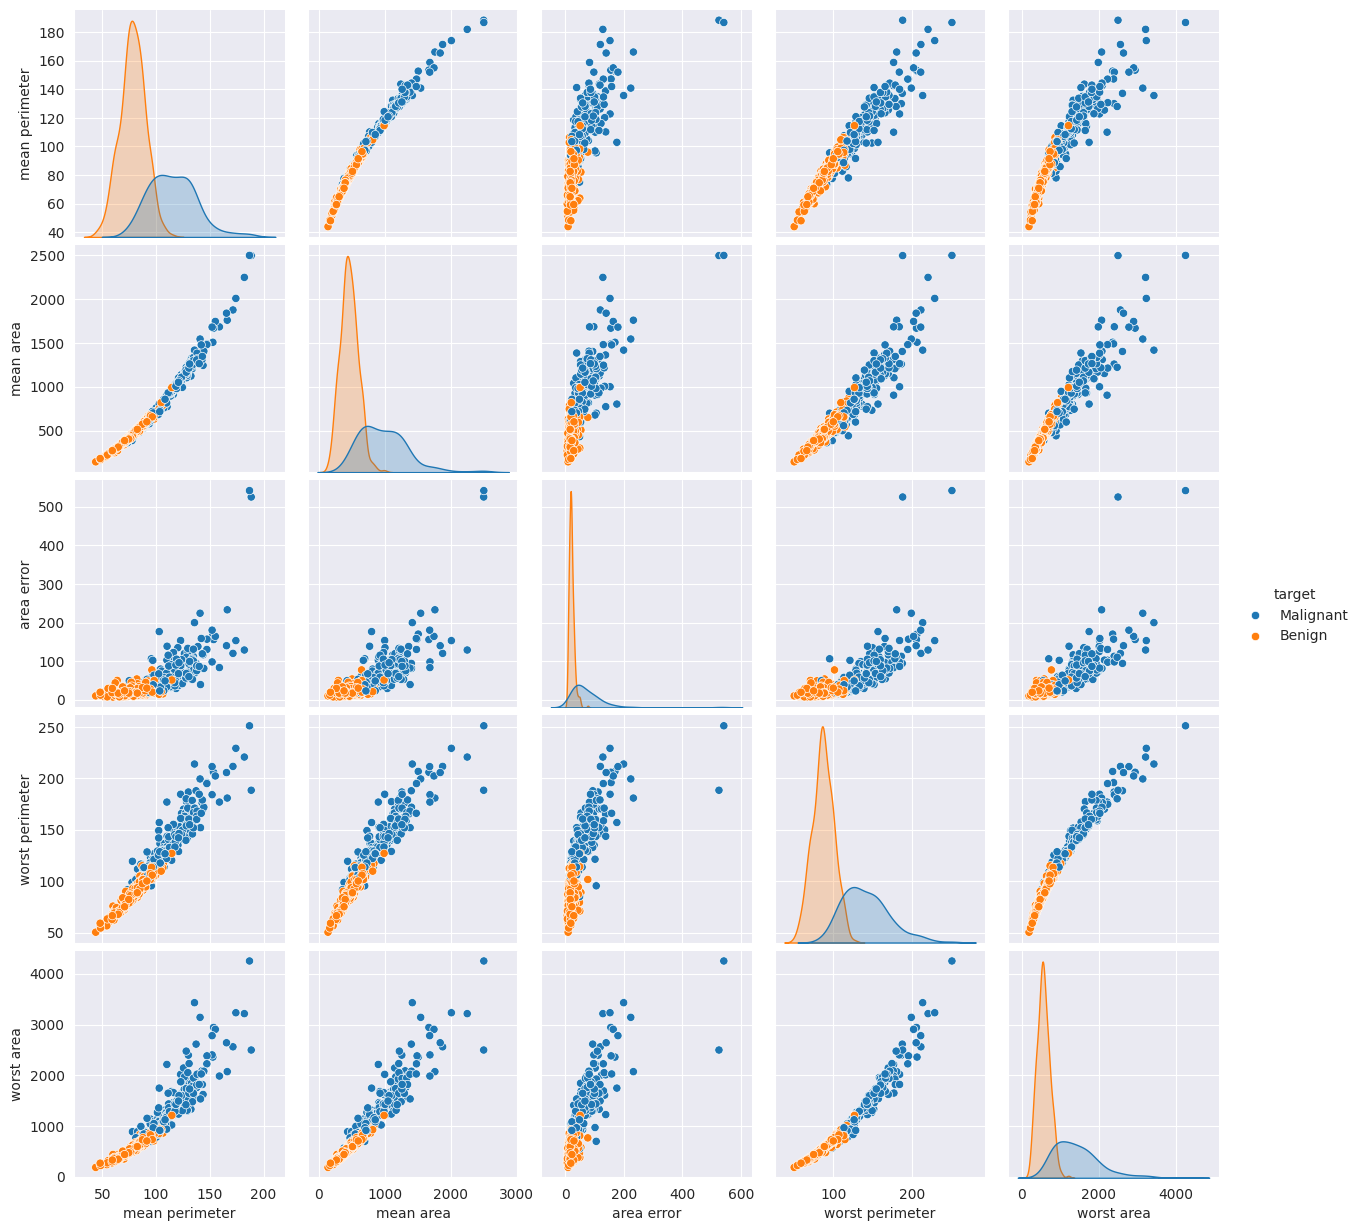

In [32]:
sns.pairplot(pd.concat([X, df['target']], axis=1), hue='target')

**Train-Test Split**

In [33]:
from sklearn.model_selection import train_test_split
y = df_target['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

**Random Forest Classifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

**Validation**

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 64   3]
 [  3 118]]


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



### **PCA and SVM**

**Principle component analysis**

PCA transforms the data into features that explain the most variance in the data.

For a better performance of PCA, we need to scale our data so that each features has a single unit variance, which I have done this in EDA.

In [36]:
features_scaled.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [37]:
X_scaled = features_scaled

Since it's difficult to visualize high-dimensional data like our original data. I will use PCA to find the two principal components and visualize the data in this two-dimensional space.

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Text(0, 0.5, 'Second Principal Component')

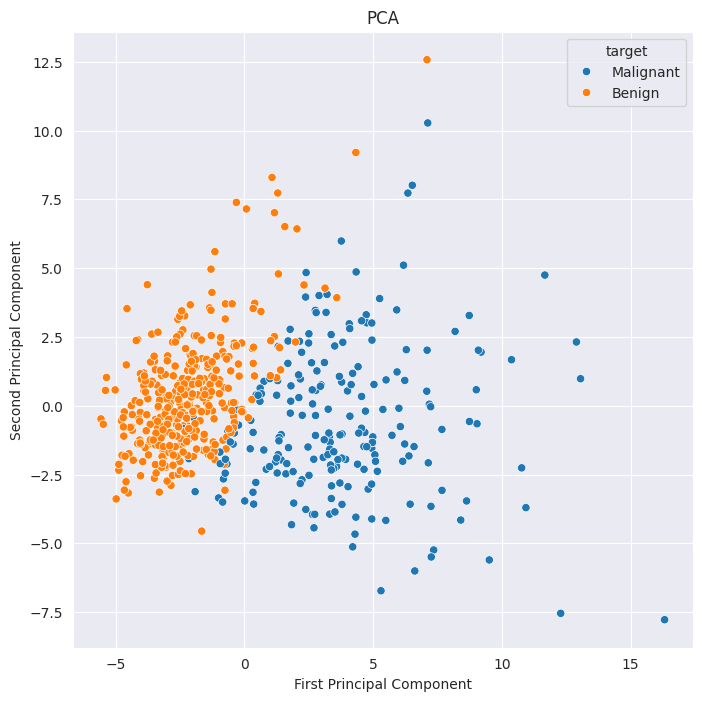

In [44]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x =X_pca[:, 0], y = X_pca[:, 1], hue=df['target'])
plt.title("PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

From here, it is clear that We can use the two principal components to separate our data between `Malignant` and `Benign`

In [45]:
X = X_pca
y = df_target['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

**Support Vector Machines (SVM)**

In [46]:
from sklearn.svm import SVC

In [48]:
# Use grid search to tune for the optimal parameter
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)

grid.fit(X_train, y_train)
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [49]:
y_pred = grid.predict(X_test)

**Validation**

In [51]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 62   5]
 [  5 116]]


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.96      0.96      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



The accuracy rate is 95%. Which is slightly worse off than the Random Forest model. However, with PCA, we have reduced the number of columns in our data.

## **Conclusion**


Here is the paraphrased version:

In the initial phase of this project, I conducted exploratory data analysis to gain insights into the 30 original features and their potential connections to cancer.

Following that, I applied univariate feature selection to identify the top 5 features for my model and used a Random Forest classifier, achieving an accuracy of 97%.

Additionally, I performed PCA to extract two principal components and created a visualization based on these components. The visualization demonstrates that even with just two variables, we can effectively distinguish between cancerous and non-cancerous cases. I then used a Support Vector Machine model for cancer prediction based on the PCA, achieving a 95% accuracy rate.

While this dataset is relatively straightforward for machine learning models to classify, my main goal was to learn data mining techniques by exploring features, selecting the most relevant ones, and implementing various machine learning models.

Thank you for reviewing my project. Feel free to reach out if you have any questions!